# TP2 Avec une couche cachée

Nous avons fait nos test par 3 epochs de 128 pour un mini batch car sa prend beaucoup de temps


In [15]:
# import libraries
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import dataset_loader
import math


# Load data set
mnistfile="./mnist.pkl.gz"
train_set, valid_set, test_set = dataset_loader.load_mnist(mnistfile)
X= train_set[0]
Y=train_set[1]

In [2]:
def softmax(z):
    """
        Perform the softmax transformation to the pre-activation values
        :param a: the pre-activation values
        :type a: ndarray
        :return: the activation values
        :rtype: ndarray
    """
    alpha = np.max(z,axis=0,keepdims=True)
    ps = np.exp(z-alpha)
    ps /= np.sum(ps,axis=0,keepdims=True)
    return ps

In [3]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [4]:
def init(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
        W1 -- weight matrix of shape (n_h, n_x)
        b1 -- bias vector of shape (n_h, 1)
        W2 -- weight matrix of shape (n_y, n_h)
        b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [5]:
def forward(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The softmax output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)  # we used the tanh actvation function
    Z2 = np.dot(W2,A1)+b2
    A2 = softmax(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [6]:
def backward(parameters, cache, X, Y):
    """
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (784, number of examples)
    Y -- "one_hot_batch" labels vector of shape (10, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
   
    A1 = cache['A1']
    A2 = cache['A2']

    dZ2= A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [7]:
def compute_loss(A2, Y, parameters):
    """
    
    Arguments:
    A2 -- The softmax output of the second activation, of shape (1, number of examples)
    Y -- one hot vector of shape (10, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost 
    """
    
    m = Y.shape[1] # number of example

    
    logprobs = np.sum(Y*np.log(A2))
    loss = -np.sum(logprobs)/m
    
    loss = np.squeeze(loss)     
    
    return loss

In [8]:

def update(parameters, grads, learning_rate = 1.2):
    """    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [9]:
def nn_model(X, Y_train, n_h, num_iterations = 10000):
    """
    Arguments:
    X -- dataset of shape (784, number of examples)
    Y -- labels of shape (10, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_label = 10
    n_training = X.shape[1]
    Y = np.zeros((n_label,n_training))
    for j in range(n_training):
        Y[Y_train[j]][j]= 1
        
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = init(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    costs = []
    for i in range(0, num_iterations):
         
        A2, cache = forward(X, parameters)
        loss = compute_loss(A2, Y, parameters)
        grads = backward(parameters, cache, X, Y)
        parameters = update(parameters, grads)
        costs.append(loss)

    return parameters,costs

In [10]:

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector of shape (10, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((10,m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k*mini_batch_size : (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches *mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches *mini_batch_size : ]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [22]:
def train_model(X, Y_train,test_set, n_h, mini_batch_size=64, nb_epochs = 1000, learning_rate = 0.1):
    """
    Arguments:
    X -- dataset of shape (784, number of examples)
    Y -- labels of shape (10, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop    
    Returns:
    parameters -- parameters learnt by the model.
    losses function array
    score array
    score_test array.
    """
    seed = 10
    n_label = 10
    n_training = X.shape[1]
    Y = np.zeros((n_label,n_training))
    X_test= test_set[0]
    for j in range(n_training):
        Y[Y_train[j]][j]= 1
        
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = init(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    losses = []
    scores = []
    scores_test_set=[]

    # Gradient Optimisation
    for i in range(nb_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            A2, cache = forward(minibatch_X, parameters)
            loss = compute_loss(A2, minibatch_Y, parameters)
            grads = backward(parameters, cache, minibatch_X, minibatch_Y)
            parameters = update(parameters, grads)
            losses.append(loss)    
            p = predict(parameters, X)
            scores.append(np.squeeze(meanAccuracy( p, train_set[1])))
            p2 = predict(parameters, X_test.T)
            scores_test_set.append(np.squeeze(meanAccuracy( p2, test_set[1])))
    return parameters,losses,scores,scores_test_set

In [12]:
def predict(parameters, X):
    """    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions from 0 to 9
    """
    A2, cache = forward(X, parameters)
    predictions = np.argmax(A2,axis=0)
    return predictions

In [13]:
def meanAccuracy( p, y):
        """
        It calculates mean-per class accuracy
        :param x: Input sample
        :param y: label sample
        :return: mean-per class accuracy
        """
        return np.mean(np.equal(p, y))

In [23]:
parameters,loss,scores,scores_test_set = train_model(X.T, Y,test_set,20,128,2,0.1)


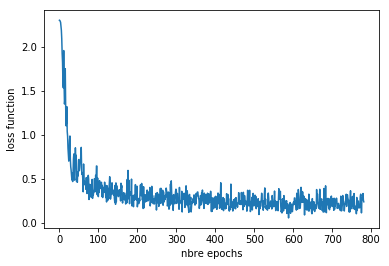

In [24]:
plt.plot(loss)
plt.ylabel('loss function')
plt.xlabel('nbre epochs')
plt.show()


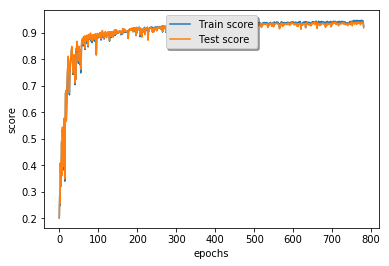

In [25]:
plt.plot(scores, label= str("Train score"))
plt.plot(scores_test_set, label= str("Test score"))

plt.ylabel('score')
plt.xlabel('epochs')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [29]:
print("accuracy for training set :")
predictions = predict(parameters, train_set[0].T) # train set
print(meanAccuracy( predictions, train_set[1].reshape(1,-1)))
print("accuracy for test set :")
predictions_t = predict(parameters, test_set[0].T) # train set
print(meanAccuracy( predictions_t, test_set[1].reshape(1,-1)))

accuracy for training set :
0.925
accuracy for test set :
0.9194


On vois bien que le modèle donne de meilleur résultat avac une couche caché.

## test de nombre n_h nombre d'unité dans la couche caché  =[5,8,10,20]

n_h is: 5

-------------------------------------------------------

n_h is: 8

-------------------------------------------------------

n_h is: 10

-------------------------------------------------------

n_h is: 20

-------------------------------------------------------



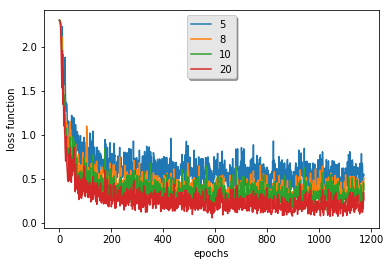

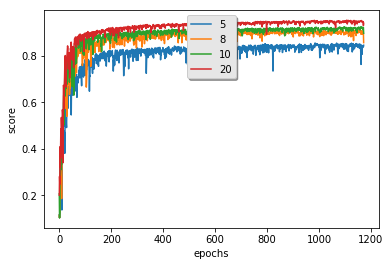

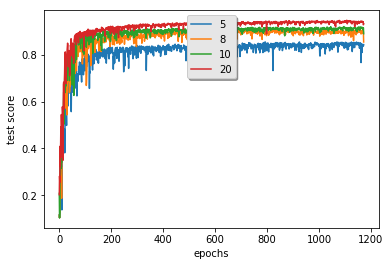

In [27]:
n_h = [5,8,10,20]
loss = {}
score={}
test_score={}
for i in n_h:
    print ("n_h is: " + str(i))
    p,loss[str(i)],score[str(i)],test_score[str(i)] = train_model(X.T, Y,test_set,i,128,3,0.1)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in n_h:
    plt.plot(np.squeeze(loss[str(i)]), label= str(i))

plt.ylabel('loss function')
plt.xlabel('epochs')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
## score plot 
for i in n_h:
    plt.plot(np.squeeze(score[str(i)]), label= str(i))

plt.ylabel('score')
plt.xlabel('epochs')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## score of test set plot 
for i in n_h:
    plt.plot(np.squeeze(test_score[str(i)]), label= str(i))

plt.ylabel('test score')
plt.xlabel('epochs')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

la on remarque que 20 unitées de couche caché donne de meilleurs resultats.
dans il faut choisir la bonne valeur de l'hyperparametre n_h. 
_ Nous avons aussi obtenu un score de > 94% en utilisant  batch-size = 200 , nb_iter = 3.